In [ ]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Loading Data
df = pd.read_csv(df = pd.read_csv("C:/Users/JK_al/OneDrive/Escritorio/CODING/Python/Curso_Luke/Base_de_datos/job_postings_flat.csv"))

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
role = 'Data Engineer'
df_US_DE = df[(df['job_title_short']==role)&(df['job_country']=='United States')].copy()
df_US_DE = df_US_DE.dropna(subset='salary_year_avg')
df_US_DE = df_US_DE.explode('job_skills')
df_US_DE[['job_skills','salary_year_avg']].head()

,job_skills,salary_year_avg
253,scala,300000.0
253,python,300000.0
253,spark,300000.0
737,python,165000.0
737,nosql,165000.0


In [3]:
df_US_DE_skills = df_US_DE.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
df_US_DE_skills = df_US_DE_skills.rename(columns={'count': 'skill_count', 'median':'median_salary'}) 
df_US_DE_skills 

,skill_count,median_salary
job_skills,,
sql,5324,129999.75
python,5238,135000.00
aws,3292,137500.00
azure,2738,130000.00
spark,2544,140000.00
...,...,...
asp.net core,1,120000.00
trello,1,155000.00
blazor,1,50000.00


In [4]:
# Se calcula el total de trabajos y se divide por el count de los skills
df_US_DE_total = df[(df['job_title_short']==role)&(df['job_country']=='United States')].copy()
df_US_DE_total = df_US_DE_total.dropna(subset='salary_year_avg')
US_DE_job_count = len(df_US_DE_total)
df_US_DE_skills['skill_perc'] = 100*df_US_DE_skills['skill_count']/US_DE_job_count
df_US_DE_skills

,skill_count,median_salary,skill_perc
job_skills,,,
sql,5324,129999.75,68.326489
python,5238,135000.00,67.222793
aws,3292,137500.00,42.248460
azure,2738,130000.00,35.138604
spark,2544,140000.00,32.648871
...,...,...,...
asp.net core,1,120000.00,0.012834
trello,1,155000.00,0.012834
blazor,1,50000.00,0.012834


In [5]:
skill_percent = 15

In [6]:
df_US_DE_skills_HD = df_US_DE_skills[df_US_DE_skills['skill_perc']>skill_percent]
df_US_DE_skills_HD

,skill_count,median_salary,skill_perc
job_skills,,,
sql,5324,129999.75,68.326489
python,5238,135000.00,67.222793
aws,3292,137500.00,42.248460
azure,2738,130000.00,35.138604
spark,2544,140000.00,32.648871
snowflake,1943,136000.00,24.935832
java,1789,138100.00,22.959446
kafka,1492,150000.00,19.147844
scala,1473,140500.00,18.904004


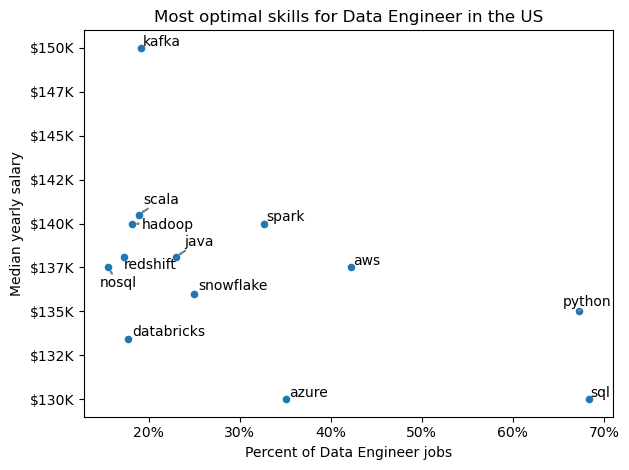

In [7]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter  

df_US_DE_skills_HD.plot(kind='scatter', x='skill_perc', y='median_salary')

texts = []
for i, txt in enumerate(df_US_DE_skills_HD.index):
    texts.append(plt.text(df_US_DE_skills_HD['skill_perc'].iloc[i], df_US_DE_skills_HD['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

ax =plt.gca()  
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.ylabel('Median yearly salary')
plt.xlabel(f'Percent of {role} jobs')
plt.title(f'Most optimal skills for {role} in the US')
plt.tight_layout()
plt.show()

Lo siguiente es opcional pero muy importante saberlo para la grafica


In [8]:
# Este codigo es para desenredar la columna de 'job_skill_type' que es un diccionario
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

In [9]:
# Se convierte el diccionario gigante en un DataFrame
df_technology_DF = pd.DataFrame(list(technology_dict.items()), columns=['technology','skills'])
df_technology_DF = df_technology_DF.explode('skills')
df_technology_DF

,technology,skills
0,analyst_tools,ms access
0,analyst_tools,sap
0,analyst_tools,spss
0,analyst_tools,esquisse
0,analyst_tools,ssrs
...,...,...
9,sync,webex
9,sync,symphony
9,sync,mattermost
9,sync,unify


In [10]:
# Usamos merge para unir los dos dataframes, el creado con los filtros y el creado por el diccionario
df_plot = df_US_DE_skills_HD.merge(df_technology_DF, left_on='job_skills', right_on='skills')
df_plot

,skill_count,median_salary,skill_perc,technology,skills
0,5324,129999.75,68.326489,programming,sql
1,5238,135000.00,67.222793,programming,python
2,3292,137500.00,42.248460,cloud,aws
3,2738,130000.00,35.138604,cloud,azure
4,2544,140000.00,32.648871,libraries,spark
5,1943,136000.00,24.935832,cloud,snowflake
6,1789,138100.00,22.959446,programming,java
7,1492,150000.00,19.147844,libraries,kafka
8,1473,140500.00,18.904004,programming,scala
9,1419,140000.00,18.210986,libraries,hadoop


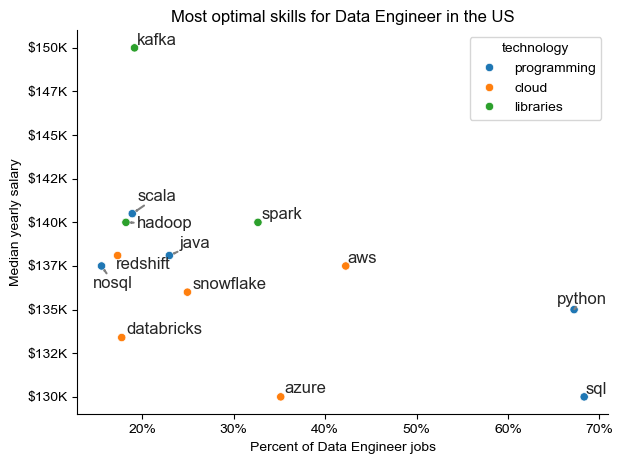

In [11]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter  

# df_plot.plot(kind='scatter', x='skill_perc', y='median_salary')
sns.scatterplot(df_plot, x='skill_perc', y='median_salary', hue='technology')
sns.despine()
sns.set_theme(style='ticks')

texts = []
for i, txt in enumerate(df_US_DE_skills_HD.index):
    texts.append(plt.text(df_US_DE_skills_HD['skill_perc'].iloc[i], df_US_DE_skills_HD['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

ax =plt.gca()  
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.ylabel('Median yearly salary')
plt.xlabel(f'Percent of {role} jobs')
plt.title(f'Most optimal skills for {role} in the US')
plt.tight_layout()
plt.show()